##### Copyright 2020 Lima Vallantin

In [1]:
# install tensorflow datasets
!pip install -U tensorflow_datasets

Requirement already up-to-date: tensorflow_datasets in /opt/anaconda3/envs/vallantin/lib/python3.7/site-packages (3.1.0)


In [2]:
# import libraries
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

# Import the datasets
import tensorflow_datasets as tfds

In [3]:
# import the mnist dataset
data, metadata = tfds.load('mnist', as_supervised=True, with_info=True)

# get the training and testing sets
train, test = data['train'], data['test']

In [4]:
# check the number of examples on the dataset
train_len = metadata.splits['train'].num_examples
test_len = metadata.splits['test'].num_examples

print("There are {} train examples on the dataset".format(train_len))
print("There are {} test examples on the dataset".format(test_len))

There are 60000 train examples on the dataset
There are 10000 test examples on the dataset


In [5]:
# normalize data
def normalize(images, labels):
    # transform into float
    images = tf.cast(images, tf.float32)
    # Images pixels are between 0 and 255. Transform them so they range between 0 and 1. 
    images /= 255
    return images, labels

# Apply the normalize function to the train/test datasets
train =  train.map(normalize)
test  =  test.map(normalize)

# Cache images in memory for faster training
# Avoids loading images from disc evertyme 
train =  train.cache()
test  =  test.cache()

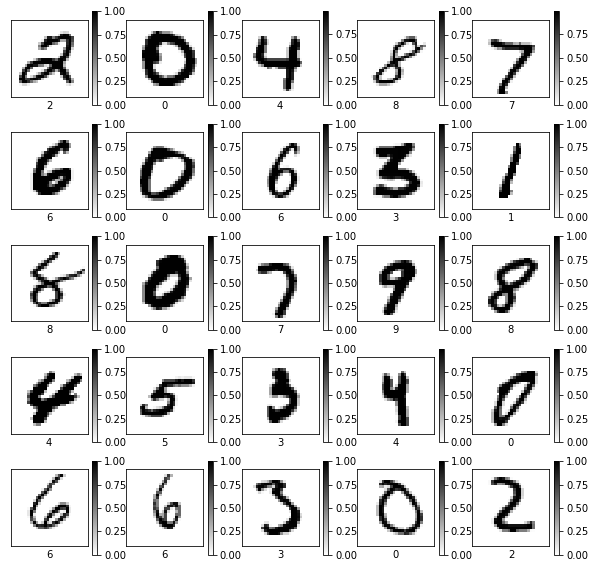

In [6]:
# check some images on the dataset
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.colorbar()
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(label.numpy())
    i += 1

In [7]:
# build the model
model = tf.keras.Sequential([
    # Flatten transforms a 28x28 2D array into a single 784 pixels vector
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    
    # Dense layer with 128 neurons
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    
    # last dense layer with the results in a probability form
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [8]:
#compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [9]:
# training
BATCH_SIZE = 32
train = train.cache().repeat().shuffle(train_len).batch(BATCH_SIZE)
test = test.cache().batch(BATCH_SIZE)

# fit
model.fit(train, epochs=5, steps_per_epoch=math.ceil(train_len/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 2s 971us/step - loss: 0.2509 - accuracy: 0.9298
Epoch 2/5
1875/1875 [==============================] - 2s 969us/step - loss: 0.1081 - accuracy: 0.9675
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0738 - accuracy: 0.9772: 0s - loss: 0.0765 - ac
Epoch 4/5
1875/1875 [==============================] - 2s 942us/step - loss: 0.0567 - accuracy: 0.9824
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0444 - accuracy: 0.9864


In [10]:
# evaluate using the whole test dataset
test_loss, test_accuracy = model.evaluate(test, steps=math.ceil(test_len/BATCH_SIZE))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0801 - accuracy: 0.9760
Accuracy on test dataset: 0.9760000109672546
